In [1]:
import numpy as np
import matplotlib.pyplot as plt
from regions import Regions
import regions
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

from smart_plotters.jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
from smart_plotters.cutout_plot import get_cutout_405, get_cutout_jwst_ice
from smart_plotters import cmd_plot

#import importlib as imp

#imp.reload(cmd_plot)

In [2]:
cat_use = make_cat_use()


In [3]:
cat_deepice = JWSTCatalog(cat_use.catalog[(cat_use.color('f405n', 'f466n') < -0.3) & (cat_use.catalog['emag_ab_f405n'] < 0.05) & (cat_use.catalog['emag_ab_f466n'] < 0.05)])

In [4]:
fn = '/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'
hdu = fits.open(fn)
ww = WCS(hdu['SCI'].header)
nanfield = np.nan * hdu['SCI'].data

<Axes: xlabel='[F182M] - [F212N]', ylabel='[F405N] - [F466N]'>

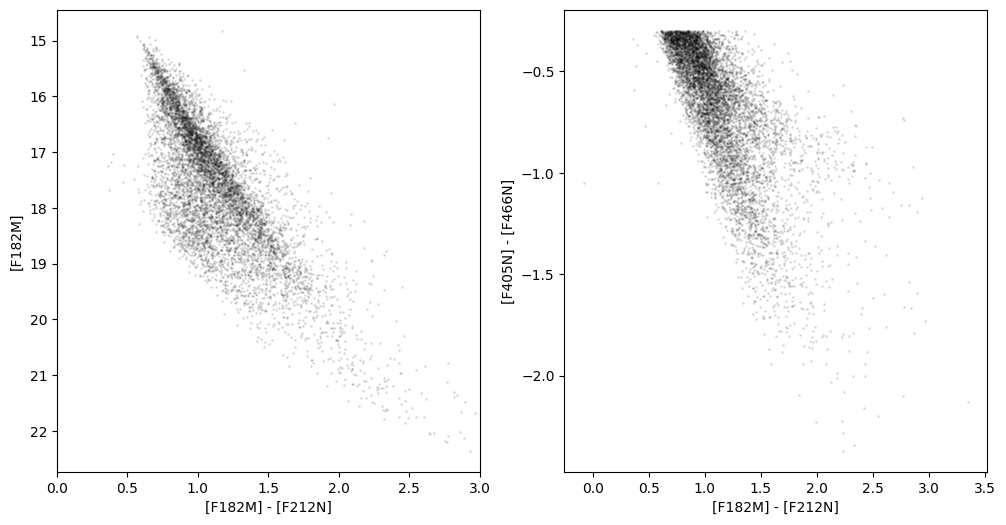

In [5]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(121)
cat_deepice.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.1, color='k', ax=ax)
ax.set_xlim(0, 3)

ax2 = plt.subplot(122)
cat_deepice.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', s=1, alpha=0.1, color='k', ax=ax2)

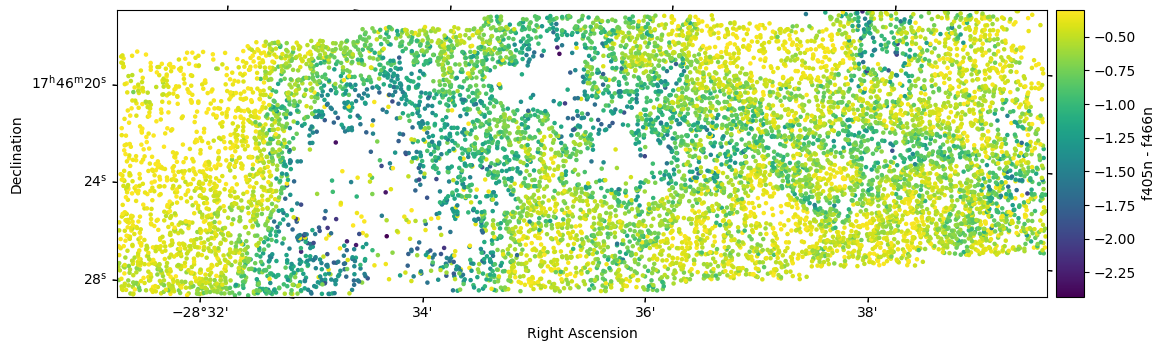

In [6]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection=ww)
ax.imshow(nanfield)
cat_deepice.plot_position(s=5, c=cat_deepice.color('f405n', 'f466n'), cmap='viridis', transform=ax.get_transform('world'))
cax = ax.inset_axes([1.01, 0., 0.03, 1])
plt.colorbar(ax.collections[0], cax=cax, orientation='vertical', label='f405n - f466n')

# RC Selection

In [7]:
def get_rc_sel_mask(cat):
    pt1 = (0.5, 14.3)
    pt2 = (2.0, 20.)
    y1 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
    mask_below_y1 = cat.band('f182m') > ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat.color('f182m', 'f212n') - pt1[0]) + pt1[1])

    pt1 = (0.5, 15.5)
    pt2 = (2.0, 20.9)
    y2 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
    mask_above_y2 = cat.band('f182m') < ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat.color('f182m', 'f212n') - pt1[0]) + pt1[1])
    mask_rc = mask_below_y1 & mask_above_y2

    pt1 = (0.5, 15.3)
    pt2 = (0.8, 14.5)
    y3 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
    mask_below_y3 = cat.band('f182m') > ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat.color('f182m', 'f212n') - pt1[0]) + pt1[1])
    mask_rc = mask_rc & mask_below_y3

    pt1 = (1.9, 20.5)
    pt2 = (1.5, 22)
    y4 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
    mask_above_y4 = cat.band('f182m') < ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat.color('f182m', 'f212n') - pt1[0]) + pt1[1])
    mask_rc = mask_rc & mask_above_y4

    return mask_rc

(0.0, 3.0)

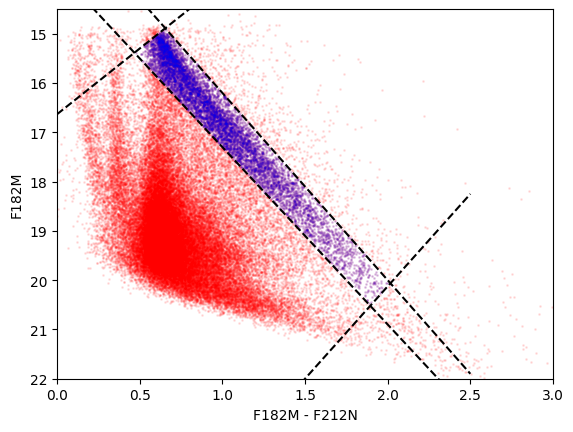

In [8]:
#plt.hexbin(cat_use.color('f182m', 'f212n'), cat_use.band('f182m'), extent=(0, 3, 14.5, 22), mincnt=1, gridsize=50, cmap='plasma', bins='log')

cat_use.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.1, color='r')

x = np.linspace(0, 2.5, 10)

pt1 = (0.5, 14.3)
pt2 = (2.0, 20.)
y1 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
mask_below_y1 = cat_use.band('f182m') > ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat_use.color('f182m', 'f212n') - pt1[0]) + pt1[1] )
plt.plot(x, y1, color='k', linestyle='dashed')

pt1 = (0.5, 15.5)
pt2 = (2.0, 20.9)
y2 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
mask_above_y2 = cat_use.band('f182m') < ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat_use.color('f182m', 'f212n') - pt1[0]) + pt1[1] )
mask_inbox = mask_below_y1 & mask_above_y2
plt.plot(x, y2, color='k', linestyle='dashed')

pt1 = (0.5, 15.3)
pt2 = (0.8, 14.5)
y3 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
mask_below_y3 = cat_use.band('f182m') > ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat_use.color('f182m', 'f212n') - pt1[0]) + pt1[1] )
mask_inbox = mask_inbox & mask_below_y3
plt.plot(x, y3, color='k', linestyle='dashed')

pt1 = (1.9, 20.5)
pt2 = (1.5, 22)
y4 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (x - pt1[0]) + pt1[1]
mask_above_y4 = cat_use.band('f182m') < ( (pt2[1] - pt1[1]) / (pt2[0] - pt1[0]) * (cat_use.color('f182m', 'f212n') - pt1[0]) + pt1[1] )
mask_inbox = mask_inbox & mask_above_y4
plt.plot(x, y4, color='k', linestyle='dashed')


cat_rc = JWSTCatalog(cat_use.catalog[mask_inbox])
cat_rc.plot_CMD('f182m', 'f212n', 'f182m', s=1, alpha=0.1, color='blue')

plt.gca().invert_yaxis()
plt.xlabel('F182M - F212N')
plt.ylabel('F182M')
plt.ylim(22, 14.5)
plt.xlim(0, 3)

# Goal: Identify stars that are and are not ice-absorbed, especially among the red clump

(0.0, 3.1)

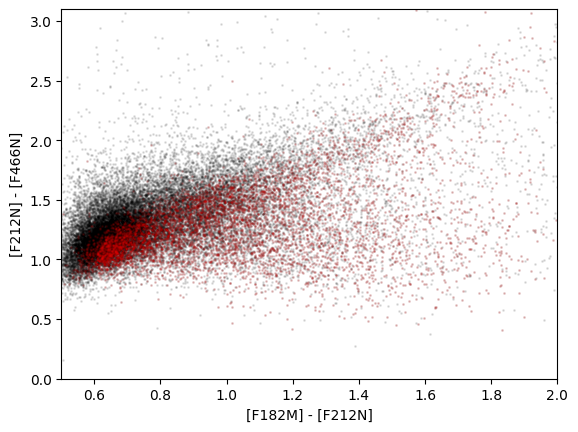

In [9]:
cat_use.plot_CCD('f182m', 'f212n', 'f212n', 'f466n', s=1, alpha=0.1, color='k')
cat_rc.plot_CCD('f182m', 'f212n', 'f212n', 'f466n', s=1, alpha=0.1, color='r')
plt.xlim(0.5, 2)
plt.ylim(0, 3.1)

(0.0, 4.0)

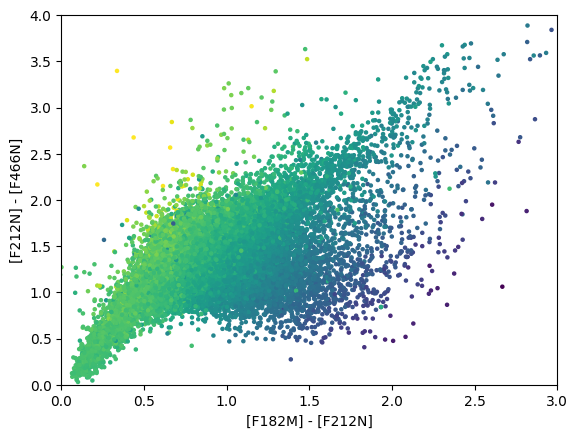

In [10]:
cat_use.plot_CCD('f182m', 'f212n', 'f212n', 'f466n', s=5, alpha=1, c=cat_use.color('f405n', 'f466n'), vmax=1)
plt.xlim(0, 3)
plt.ylim(0, 4)

(0.0, 3.1)

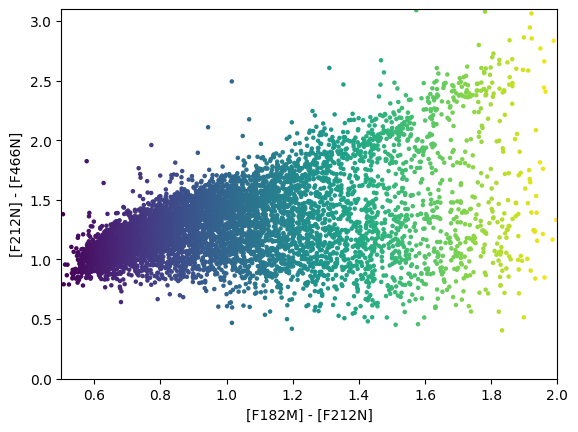

In [13]:
cat_rc.plot_CCD('f182m', 'f212n', 'f212n', 'f466n', s=5, alpha=1, c=cat_rc.color('f182m', 'f212n'), vmax=2)
plt.xlim(0.5, 2)
plt.ylim(0, 3.1)

## F212N-F466N Layers

In [14]:
# Deredden F212N and F466N 
def unextinct(cat, ext, band1, band2, Av):
    EV_band2_band1 = (ext(int(band2[1:-1])/100*u.um) - ext(int(band1[1:-1])/100*u.um))
    return cat.color(band1, band2) + EV_band2_band1 * Av

from dust_extinction.averages import CT06_MWGC, CT06_MWLoc

# Color = F212N - F466N
cat_use.catalog['Av'] = cat_use.get_Av('f182m', 'f212n')
unextinct_212_466 = unextinct(cat_use, CT06_MWGC(), 'f212n', 'f466n', Av=cat_use.catalog['Av'])
unextinct_405_466 = unextinct(cat_use, CT06_MWGC(), 'f405n', 'f466n', Av=cat_use.catalog['Av'])

In [15]:
rc_sel_mask = get_rc_sel_mask(cat_use)

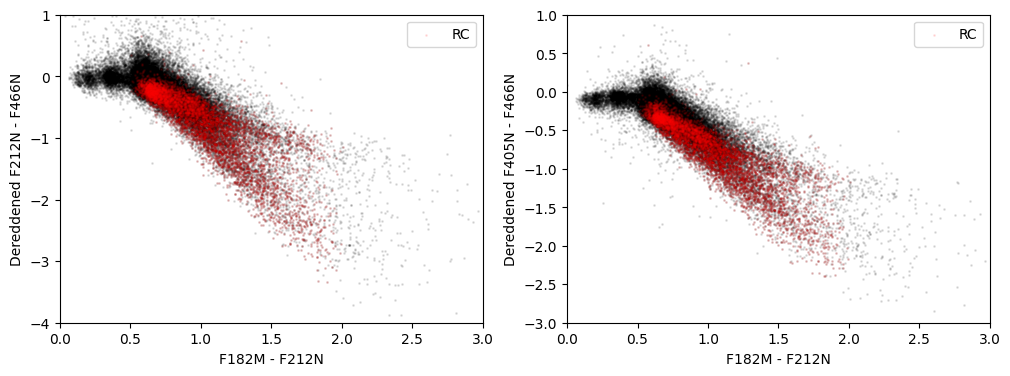

In [16]:
fig = plt.figure(figsize=(12,4))

ax = plt.subplot(121)
plt.scatter(cat_use.color('f182m', 'f212n'), unextinct_212_466, s=1, alpha=0.1, color='k')
plt.scatter(cat_use.color('f182m', 'f212n')[rc_sel_mask], unextinct_212_466[rc_sel_mask], s=1, alpha=0.1, color='r', label='RC')
plt.xlim(0, 3)
plt.ylim(-4, 1)
plt.xlabel('F182M - F212N')
plt.ylabel('Dereddened F212N - F466N')
plt.legend()

ax = plt.subplot(122)
plt.scatter(cat_use.color('f182m', 'f212n'), unextinct_405_466, s=1, alpha=0.1, color='k')
plt.scatter(cat_use.color('f182m', 'f212n')[rc_sel_mask], unextinct_405_466[rc_sel_mask], s=1, alpha=0.1, color='r', label='RC')
plt.xlim(0, 3)
plt.ylim(-3, 1)
plt.xlabel('F182M - F212N')
plt.ylabel('Dereddened F405N - F466N')
plt.legend()

## Stellar Density Maps

In [17]:
def star_density_color(tbl, ww, dx=1*u.arcsec, size=(2.6*u.arcmin, 8.4*u.arcmin)):
    bins_ra = np.arange(0, size[1].to(u.arcsec).value, dx.to(u.arcsec).value)
    bins_dec = np.arange(0, size[0].to(u.arcsec).value, dx.to(u.arcsec).value)

    bins_pix_ra = bins_ra/ww.proj_plane_pixel_scales()[1].to(u.arcsec).value
    bins_pix_dec= bins_dec/ww.proj_plane_pixel_scales()[1].to(u.arcsec).value

    crds_pix = np.array(ww.world_to_pixel(tbl['skycoord_ref']))

    h, xedges, yedges = np.histogram2d(crds_pix[1], crds_pix[0], bins=[bins_pix_dec, bins_pix_ra])
    # h[h==0] = np.nan
    return h

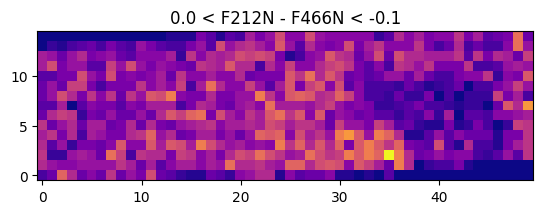

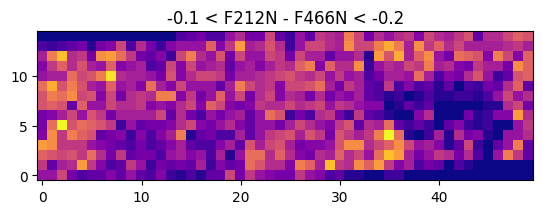

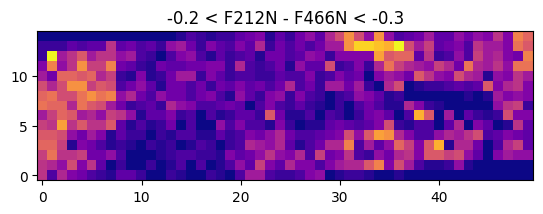

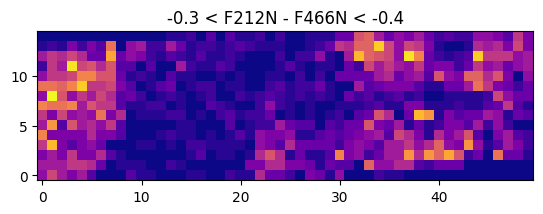

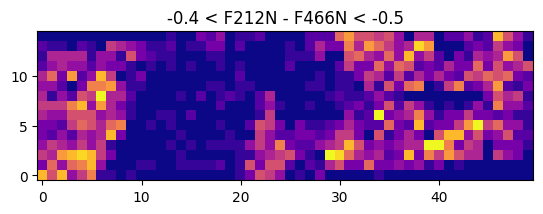

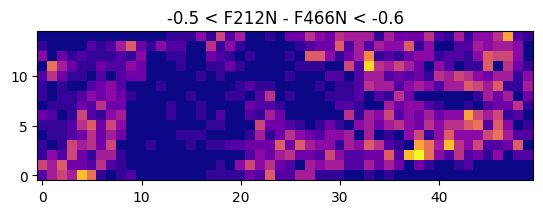

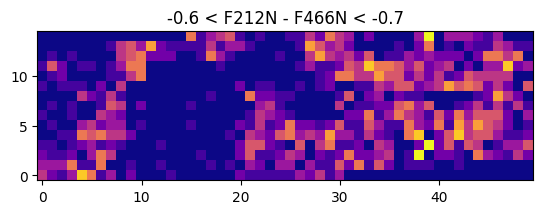

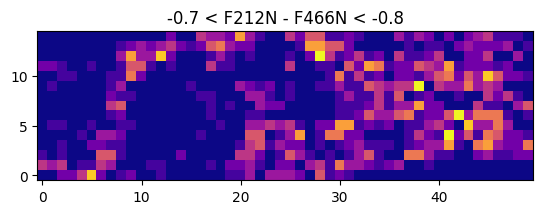

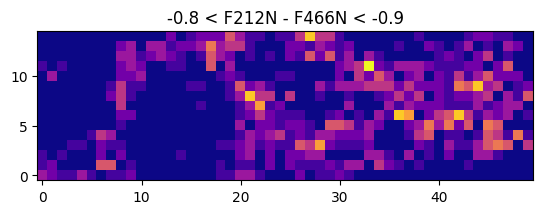

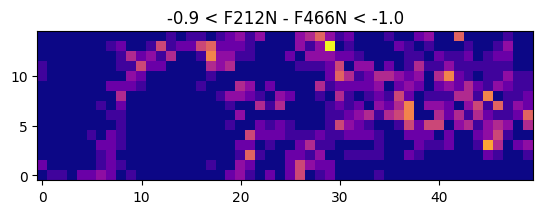

In [18]:
# x < F212N - F466N < x + 0.1 for x = 0, 0.1, 0.2 ... 1
# 0 to -0.1, -0.1 to -0.2, ... -0.9 to -1.0
for i in range(10):
    lower = i * -0.1 + 0.
    upper = lower - 0.1
    mask = (unextinct_212_466 < lower) & (unextinct_212_466 >= upper)
    density_map = star_density_color(cat_use.catalog[mask], ww, dx=10*u.arcsec, size=(2.6*u.arcmin, 8.4*u.arcmin))
    plt.imshow(density_map, origin='lower', cmap='plasma')
    plt.title(f'{lower:.1f} < F212N - F466N < {upper:.1f}')
    #plt.colorbar(label='Number of stars per 5" x 5"')
    plt.show()

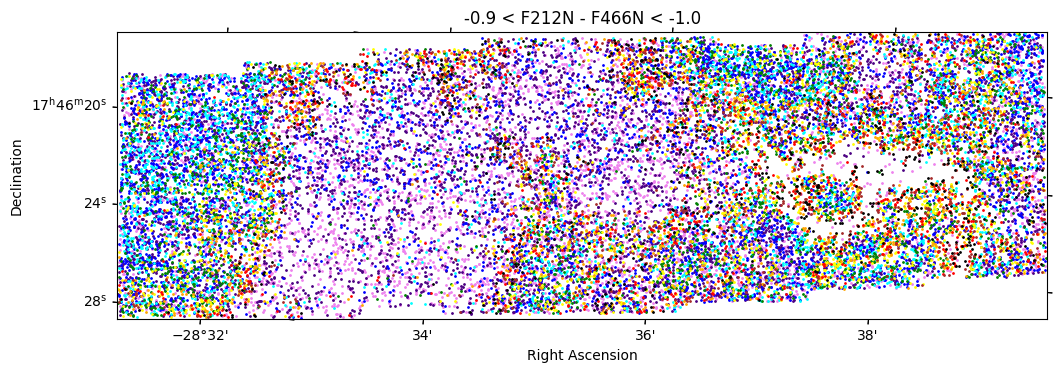

In [22]:
# x < F212N - F466N < x + 0.1 for x = 0, 0.1, 0.2 ... 1
# 0 to -0.1, -0.1 to -0.2, ... -0.9 to -1.0
# list of 10 colors in rainbow order
colors = ['violet', 'indigo', 'blue', 'cyan', 'green', 'yellow', 'orange', 'red', 'brown', 'black']
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection=ww)
ax.imshow(nanfield)
for i in range(10):
    lower = i * -0.1 + 0.
    upper = lower - 0.1
    mask = (unextinct_212_466 < lower) & (unextinct_212_466 >= upper)
    cat_masked = JWSTCatalog(cat_use.catalog[mask])
    cat_masked.plot_position(s=1, c=colors[i], transform=ax.get_transform('world'))
    plt.title(f'{lower:.1f} < F212N - F466N < {upper:.1f}')
    #plt.colorbar(label='Number of stars per 5" x 5"')
    #plt.show()

In [20]:
np.min(unextinct_212_466), np.max(unextinct_212_466)

(-10.662864863096855, 8.197805957513458)

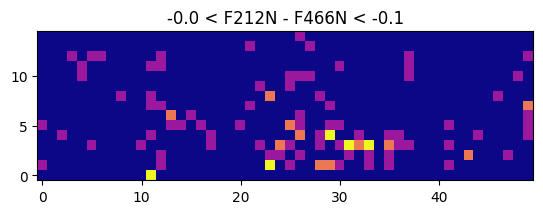

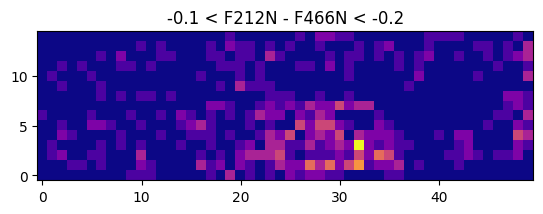

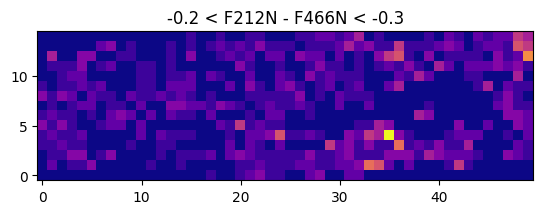

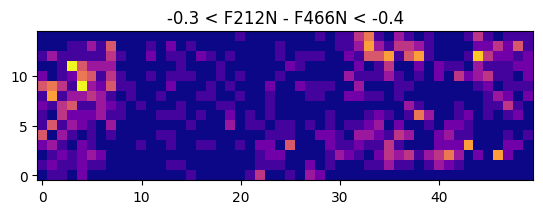

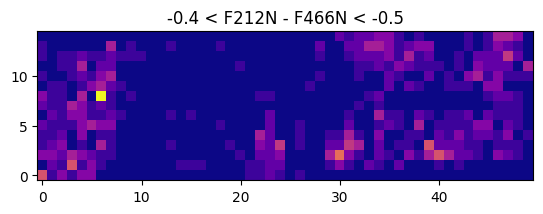

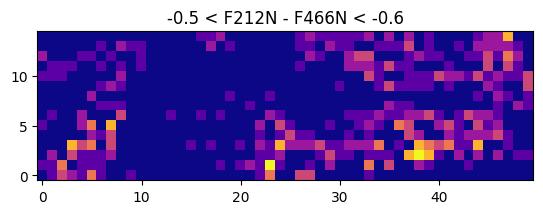

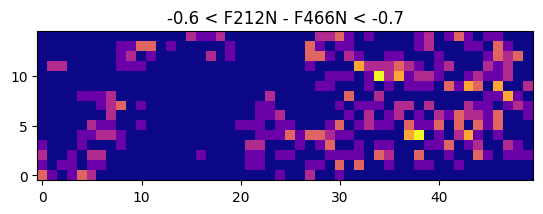

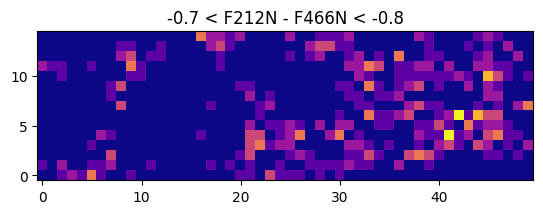

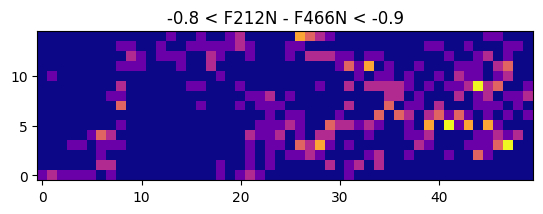

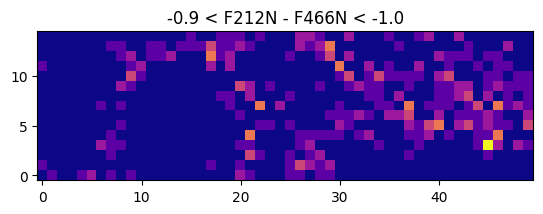

In [21]:
# x < F212N - F466N < x + 0.1 for x = 0, 0.1, 0.2 ... 1
# 0 to -0.1, -0.1 to -0.2, ... -0.9 to -1.0
for i in range(10):
    lower = i * -0.1
    upper = lower - 0.1
    mask = (unextinct_212_466 < lower) & (unextinct_212_466 >= upper) & (rc_sel_mask)
    density_map = star_density_color(cat_use.catalog[mask], ww, dx=10*u.arcsec, size=(2.6*u.arcmin, 8.4*u.arcmin))
    plt.imshow(density_map, origin='lower', cmap='plasma')
    plt.title(f'{lower:.1f} < F212N - F466N < {upper:.1f}')
    #plt.colorbar(label='Number of stars per 5" x 5"')
    plt.show()